In [1]:
# import library
import pandas as pd 
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline


pd.options.mode.chained_assignment = None


1. Load Data

In [2]:

df = pd.read_csv('movies.csv')

2. Undertanding the data

Dataset Overview:
- 7668 movies in the dataset
- Each movie has various attributes

Columns:
- Numerical: Year, Budget, Gross, Runtime, Score, Votes
- Categorical: Company, Country, Director, Genre, Name, Rating, Star, Writer
- Date: Released


In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df.columns.values

array(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross',
       'company', 'runtime'], dtype=object)

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Convert budget and gross to float

df['budget'] = df['budget'].astype(float)
df['gross'] = df['gross'].astype(float)
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Generate summary statistics
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


3. Clean The Data 


3.1 Correct the Year Column

In [10]:
df['released'] = df['released'].replace(r"\s\([^)]*\)", "", regex=True)

# Convert to datetime format
df['released'] = pd.to_datetime(df['released'], format='%B %d, %Y', errors='coerce')

# Check the result
print(df['released'])
#df.head()

0      1980-06-13
1      1980-07-02
2      1980-06-20
3      1980-07-02
4      1980-07-25
          ...    
7663   2020-10-23
7664   2020-02-07
7665   2020-04-27
7666   2020-10-01
7667   2020-08-19
Name: released, Length: 7668, dtype: datetime64[ns]


3.2 Handle Missing Values

In [11]:
#Checking for missing data
df.isnull().sum() 

name           0
rating        77
genre          0
year           0
released      59
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [12]:
#Fill missing values in object columns with 'Unknown'

object_columns = ['rating', 'released', 'writer', 'star', 'country', 'company']

for col in object_columns:
    df[col].fillna('Unknown', inplace=True)
    

# Fill missing values in numeric columns with median   
numeric_columns = ['score', 'votes', 'budget', 'gross', 'runtime']

for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)
print(df.isnull().sum())    
df.head()


name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13 00:00:00,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02 00:00:00,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20 00:00:00,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02 00:00:00,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25 00:00:00,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


3.3 Check for Duplicates

In [13]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

#No duplicate rows were found in the dataset, indicating clean, unique entries for each movie.

Number of duplicate rows: 0


3.4 Numerize Data

In [14]:
df_numerized = df.copy() #if i want to creat a copy of df
#df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes

print(df_numerized.dtypes)
df_numerized.head()

name          int16
rating         int8
genre          int8
year          int64
released      int16
score       float64
votes       float64
director      int16
writer        int16
star          int16
country        int8
budget      float64
gross       float64
company       int16
runtime     float64
dtype: object


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,16,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2320,146.0
1,5573,6,1,1980,20,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,17,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,20,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,24,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13 00:00:00,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02 00:00:00,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20 00:00:00,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02 00:00:00,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25 00:00:00,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


4. Data Analysis and Visualization

4.1 Sort data by gross earnings

In [16]:
# sorting the data 
top_grossing= df.sort_values(by=['gross'],inplace=False,ascending=False).head() 
print("Top 5 Highest Grossing Movies:")
print(top_grossing[['name', 'gross']])

Top 5 Highest Grossing Movies:
                                            name         gross
5445                                      Avatar  2.847246e+09
7445                           Avengers: Endgame  2.797501e+09
3045                                     Titanic  2.201647e+09
6663  Star Wars: Episode VII - The Force Awakens  2.069522e+09
7244                      Avengers: Infinity War  2.048360e+09


4.2 Detect outliers

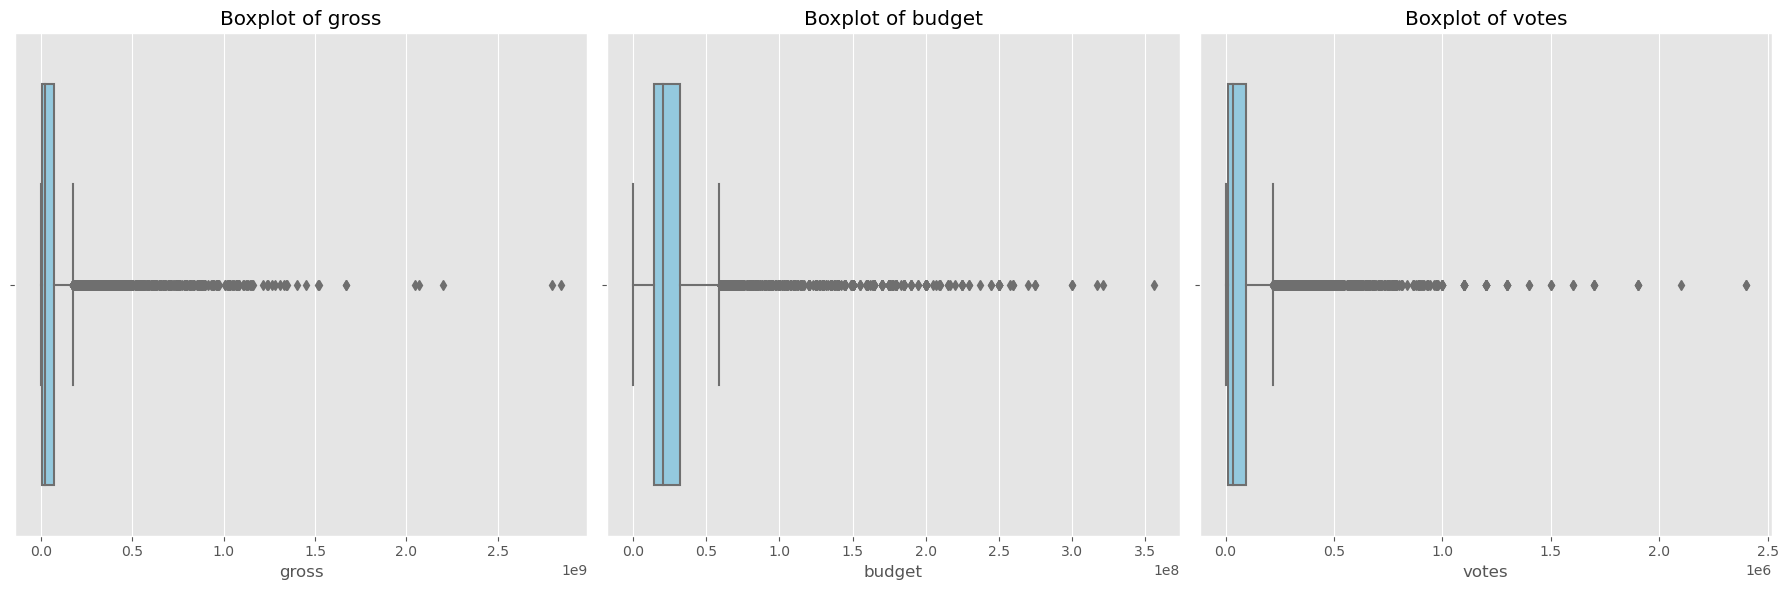

In [17]:
# detect the outliers 

numeric_columns = ['gross', 'budget', 'votes']

# Create boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, column in zip(axes, numeric_columns):
    sns.boxplot(x=df[column], ax=ax, color='skyblue')
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)
plt.tight_layout()
plt.show()

In [18]:
# Analyze outliers for each column ['gross', 'budget', 'votes']

from Function import analyze_outliers


for column in numeric_columns:
    outliers = analyze_outliers(df, column)


    # print negative values If there are any,
    if (outliers[column] < 0).any():
        print(f"\nNegative values in {column}:")
        print(outliers[outliers[column] < 0][column])


Outlier Analysis for gross:
Number of outliers: 911
count    9.110000e+02
mean     4.112898e+08
std      2.959252e+08
min      1.748044e+08
25%      2.235260e+08
50%      3.106506e+08
75%      4.744859e+08
max      2.847246e+09
Name: gross, dtype: float64
Percentage of outliers: 11.88%

Outlier Analysis for budget:
Number of outliers: 1008
count    1.008000e+03
mean     1.064889e+08
std      4.796025e+07
min      6.000000e+07
25%      7.000000e+07
50%      9.000000e+07
75%      1.300000e+08
max      3.560000e+08
Name: budget, dtype: float64
Percentage of outliers: 13.15%

Outlier Analysis for votes:
Number of outliers: 803
count    8.030000e+02
mean     4.539352e+05
std      2.893967e+05
min      2.190000e+05
25%      2.650000e+05
50%      3.570000e+05
75%      5.300000e+05
max      2.400000e+06
Name: votes, dtype: float64
Percentage of outliers: 10.47%


Interpretation:
The boxplots for gross earnings, budget, and votes show:
1. Gross Earnings: There are numerous high outliers, indicating some movies earn significantly more than the majority.
2. Budget: Similar to gross earnings, there are several high outliers, suggesting some movies have exceptionally large budgets.
3. Votes: The distribution is right-skewed with many outliers, implying a few movies receive a disproportionately high number of votes.

These outliers could represent blockbuster movies or highly popular films that significantly outperform the average in terms of earnings, budget, or audience engagement.

5. Exploratory Data Analysis

5.1 Top 10 Production Companies by Total Gross Earnings

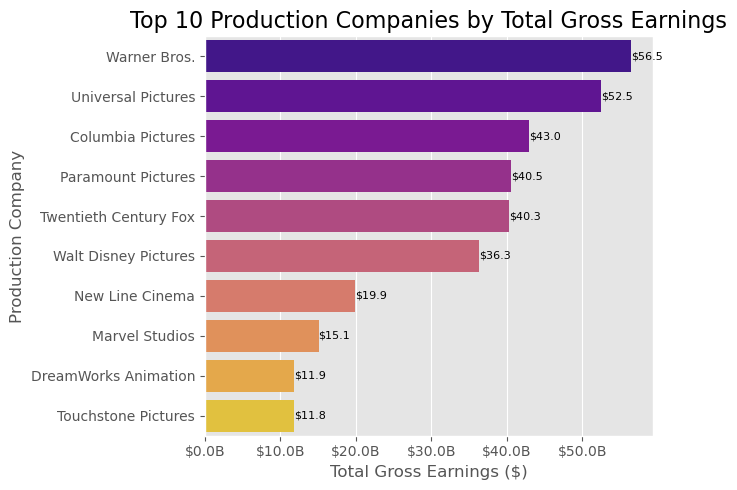

In [19]:
top_companies = df.groupby('company')['gross'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(7, 5))
ax1 = sns.barplot(x=top_companies.values, y=top_companies.index, palette='plasma')
plt.title('Top 10 Production Companies by Total Gross Earnings', fontsize=16)
plt.xlabel('Total Gross Earnings ($)', fontsize=12)
plt.ylabel('Production Company', fontsize=12)
# Add value labels to the end of each bar
for i, v in enumerate(top_companies.values):
    ax1.text(v, i, f'${v/1e9:.1f}', va='center', fontsize=8)

# Format x-axis labels to show billions
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))
plt.tight_layout()
plt.show()

5.2  Top 10 Directors by Total Gross Earnings

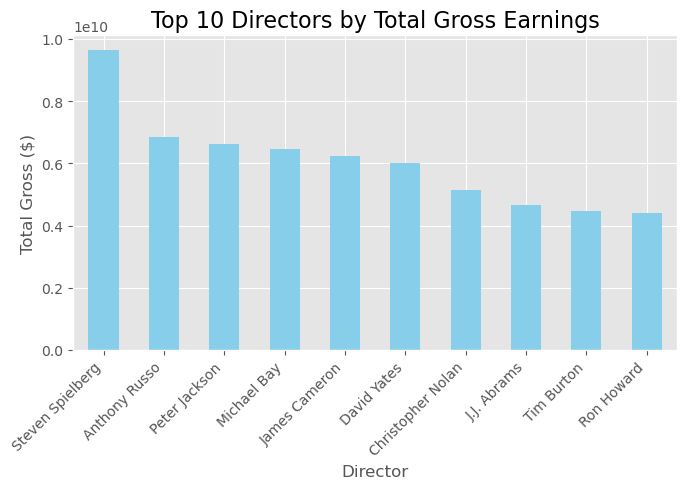

In [20]:
top_directors = df.groupby('director')['gross'].sum().nlargest(10)
plt.figure(figsize=(7, 5))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors by Total Gross Earnings', fontsize=16)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Total Gross ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

5.3 Box Office Performance Distribution by Country

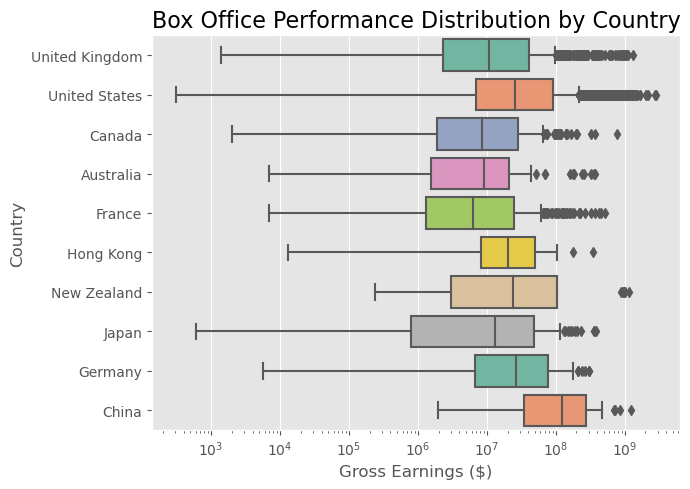

In [21]:
country_gross = df.groupby('country')['gross'].sum().sort_values(ascending=False)

# Create a Box plot for distribution of gross earnings within countries
plt.figure(figsize=(7, 5))
sns.boxplot(x='gross', y='country', data=df[df['country'].isin(country_gross.index[:10])], palette='Set2')
plt.title('Box Office Performance Distribution by Country', fontsize=16)
plt.xlabel('Gross Earnings ($)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xscale('log')  # Use log scale for better visibility if needed
plt.tight_layout()
plt.show()

1. The USA dominates in terms of both median gross earnings and the range of earnings, which is expected given Hollywood's global influence.
2. There's significant variation within each country, as shown by the box plots' ranges.
3. Some countries (like the UK and France) show potential for high-grossing outliers, suggesting they occasionally produce internationally successful films.

5.4 Number of Movies Produced Over the Years

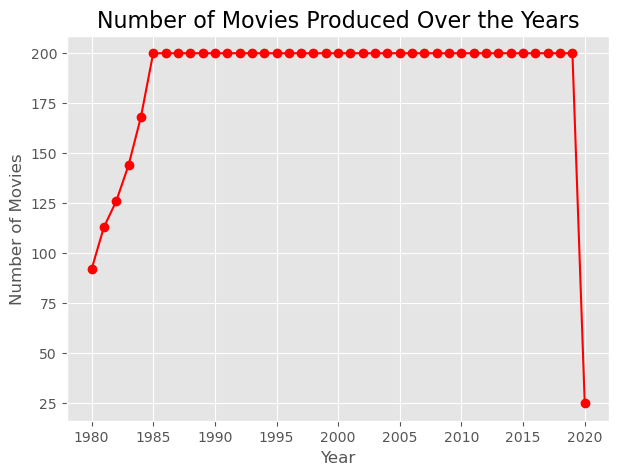

In [22]:
# Number of movies produced each year

movies_per_year = df.groupby('year')['name'].count()

# plot 
plt.figure(figsize=(7, 5))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', color='r', linestyle='-')
plt.title("Number of Movies Produced Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.show()

6. Correlation Analysis

6.1 Budget vs. Gross Earnings

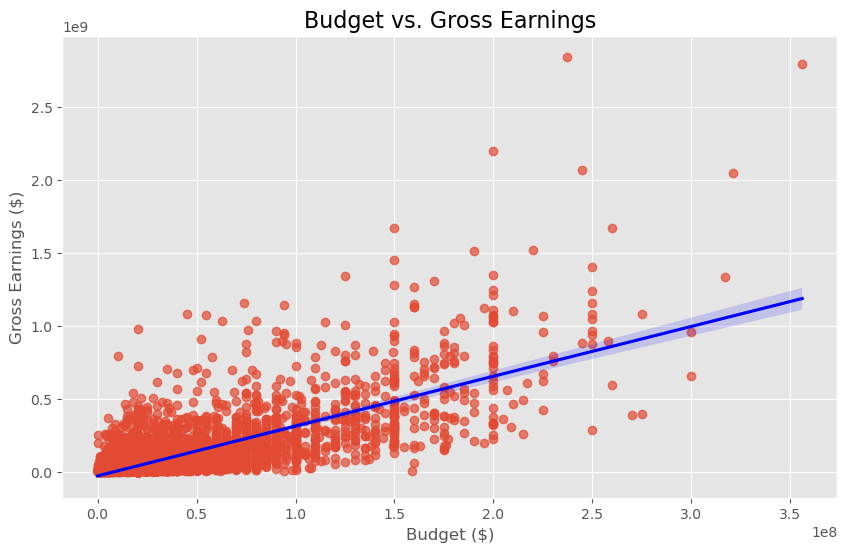

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'alpha':0.7}, line_kws={'color': 'blue'})
plt.title('Budget vs. Gross Earnings', fontsize=16)
plt.xlabel('Budget ($)', fontsize=12)
plt.ylabel('Gross Earnings ($)', fontsize=12)
plt.show()

# Observation: There appears to be a positive correlation between budget and gross earnings,


6.2 Pairplot of Gross, Budget, Score, and Votes

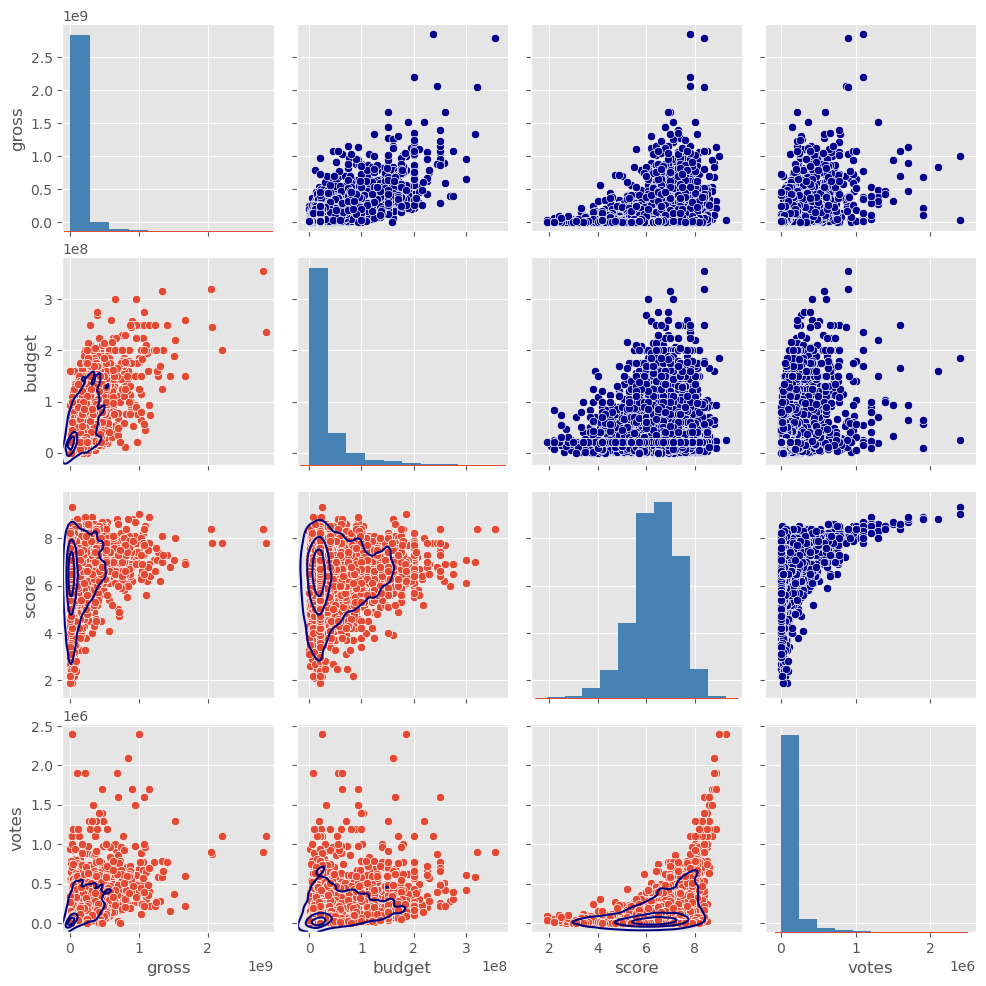

<Figure size 1000x800 with 0 Axes>

In [24]:
new_df = pd.DataFrame(df, columns=['gross', 'budget', 'score', 'votes'])

# Then adjust your pairplot code to accommodate the fourth variable
g = sns.pairplot(new_df, diag_kind="kde")
g.map_upper(sns.scatterplot, color='darkblue')
g.map_lower(sns.kdeplot, levels=4, color="navy")
g.map_diag(plt.hist, color="steelblue")

plt.figure(figsize=(10, 8))  # Slightly larger figure to accommodate the additional variable
plt.show()

1. Gross vs Budget: Strong positive correlation, confirming our earlier observation.
2. Gross vs Score: Weak positive correlation; better-rated movies may earn slightly more. 
3. Gross vs Votes: Positive correlation; popular movies (more votes) tend to gross higher. 
4. Budget vs Score: Weak or no clear correlation; higher budgets don't necessarily mean better scores. 
5. Budget vs Votes: Positive correlation; higher budget films often attract more audience attention. 
6. Score vs Votes: Moderate positive correlation; better-rated movies tend to get more votes.
Key Insights: 
- Financial success (gross) is most strongly influenced by budget and popularity (votes). 
- Critical reception (score) has a weaker influence on financial performance than expected. 
- High-budget films tend to be more popular but not necessarily better rated. 


6.3 Correlation Matrix

In [25]:
# Correlation Matrix between all numeric columns
df.corr(method='pearson') #pearson, kendall, spearman   pearson is default

,year,score,votes,budget,gross,runtime
year,1.000000,0.098013,0.222573,0.291690,0.259504,0.120662
score,0.098013,1.000000,0.409157,0.061931,0.185563,0.399407
votes,0.222573,0.409157,1.000000,0.460968,0.632120,0.309151
budget,0.291690,0.061931,0.460968,1.000000,0.745881,0.273371
gross,0.259504,0.185563,0.632120,0.745881,1.000000,0.244380
runtime,0.120662,0.399407,0.309151,0.273371,0.244380,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

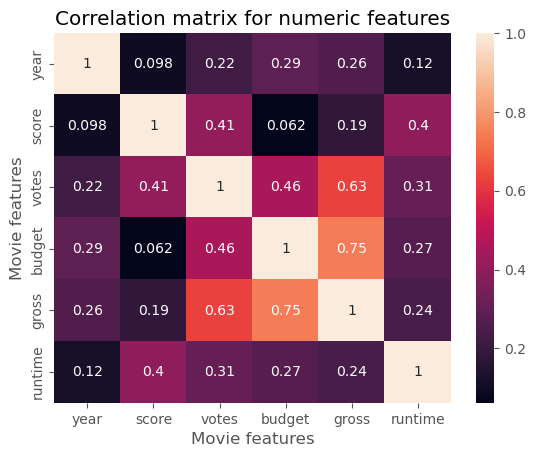

In [26]:
#  a heatmap for the correlations for the numeric columns
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show

6.4 Correlation Matrix for Numerized Data

<function matplotlib.pyplot.show(*args, **kw)>

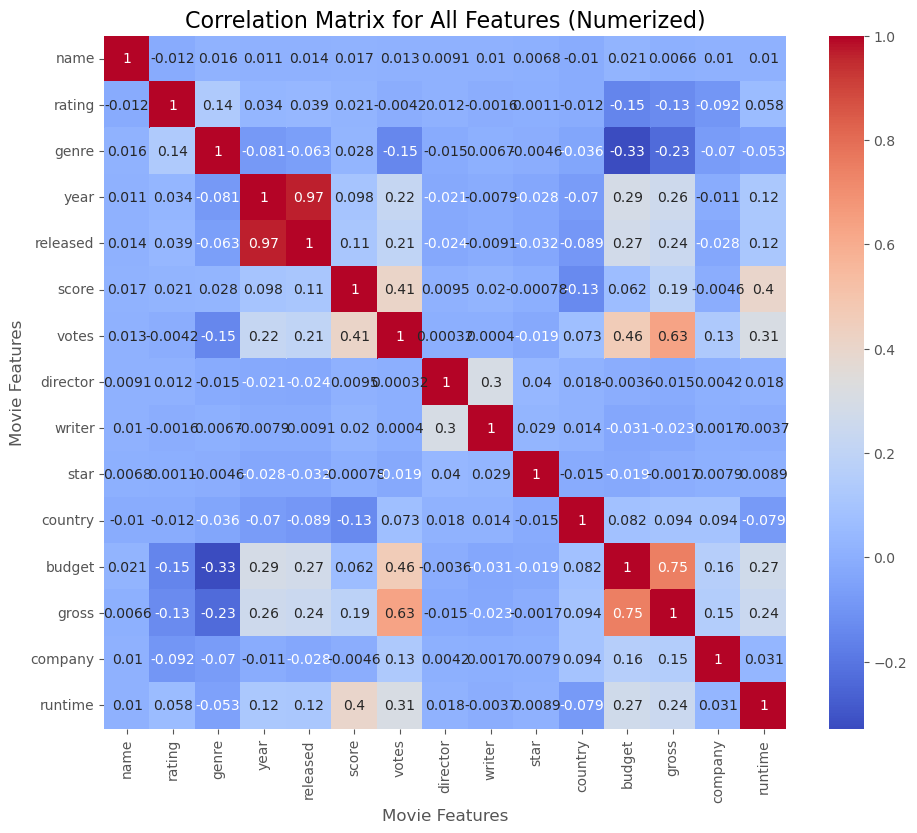

In [27]:
correlation_matrix_numerized = df_numerized.corr(method='pearson')
plt.figure(figsize=(11, 9)) 
sns.heatmap(correlation_matrix_numerized, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix for All Features (Numerized)', fontsize=16)
plt.xlabel('Movie Features', fontsize=12)
plt.ylabel('Movie Features', fontsize=12)
plt.show

1. The strongest positive correlations are between gross earnings and budget, and between gross earnings and votes.
2. The year of release shows a moderate positive correlation with gross earnings, possibly due to inflation or the general growth of the movie industry.
3. The score (rating) has a weaker correlation with gross earnings than might be expected, suggesting critical acclaim doesn't always translate to box office success.
4. The high correlation between 'released' and 'year' is expected and doesn't provide additional insights

 6.5 High Correlations

In [28]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]
print("Highly correlated pairs:")
print(high_corr)

Highly correlated pairs:
votes     gross       0.632120
gross     votes       0.632120
          budget      0.745881
budget    gross       0.745881
year      released    0.968021
released  year        0.968021
dtype: float64


1. Budget has the strongest correlation with gross earnings, suggesting it's a good predictor of a movie's financial success.
2. The number of votes also has a significant positive correlation with gross earnings, indicating that popular movies (those with more votes) tend to earn more.
4. There are several other interesting correlations that could warrant further investigation, such as the relationship between votes and budget.